# Data Science Project - Real Estate Valuation Prediction

## Prasetyo Wisnu N

## Goal of this notebook: 
The goal of this notebook is to predict the house price of unit area in Tawain (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared).

## Attribute Information:
The inputs are as follows:

- X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.) 
- X2=the house age (unit: year) 
- X3=the distance to the nearest MRT station (unit: meter) 
- X4=the number of convenience stores in the living circle on foot (integer) 
- X5=the geographic coordinate, latitude. (unit: degree) 
- X6=the geographic coordinate, longitude. (unit: degree) 

The output is as follow:
- Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared) 

Reference [here.](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)

## Import Dataset


In [70]:
#import package
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('Taiwan House Pricing Dataset.xlsx',index_col='No')
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df.dtypes

X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [4]:
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [5]:
df.rename(columns={'X1 transaction date':'X1','X2 house age':'X2','X3 distance to the nearest MRT station':'X3','X4 number of convenience stores':'X4','X5 latitude':'X5','X6 longitude':'X6','Y house price of unit area':'Y'},inplace=True)

In [6]:
df

,X1,X2,X3,X4,X5,X6,Y
No,,,,,,,
1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6


## EDA

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df['Y'].describe()

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: Y, dtype: float64

Dari harga rumah dapat diketahui bahwa harga rata-rata rumah sebesar 37,98 dengan harga terendah 7,6 dan harga tertinggi 117,5. Selain itu harga rata-rata dengan mediannya tidak jauh berbeda sehingga distribusinya Normal

In [9]:
import statsmodels.api as sm
import pylab as py
import scipy.stats as stats

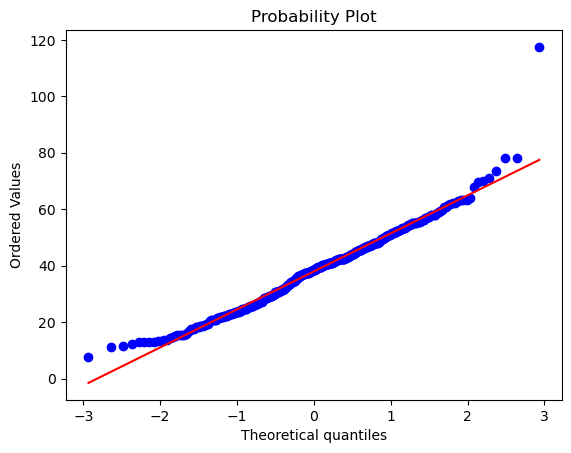

In [10]:
stats.probplot(df['Y'],dist='norm',plot=py)
py.show()

Berdasarkan statistical plot diatas, dapat dilihat dengan acuan garis distribusi normal berwarna merah, variabel Y memiliki nilai yang cukup sesuai dengan garis merah sehingga dapat dikatakan variabel Y memiliki distribusi normal

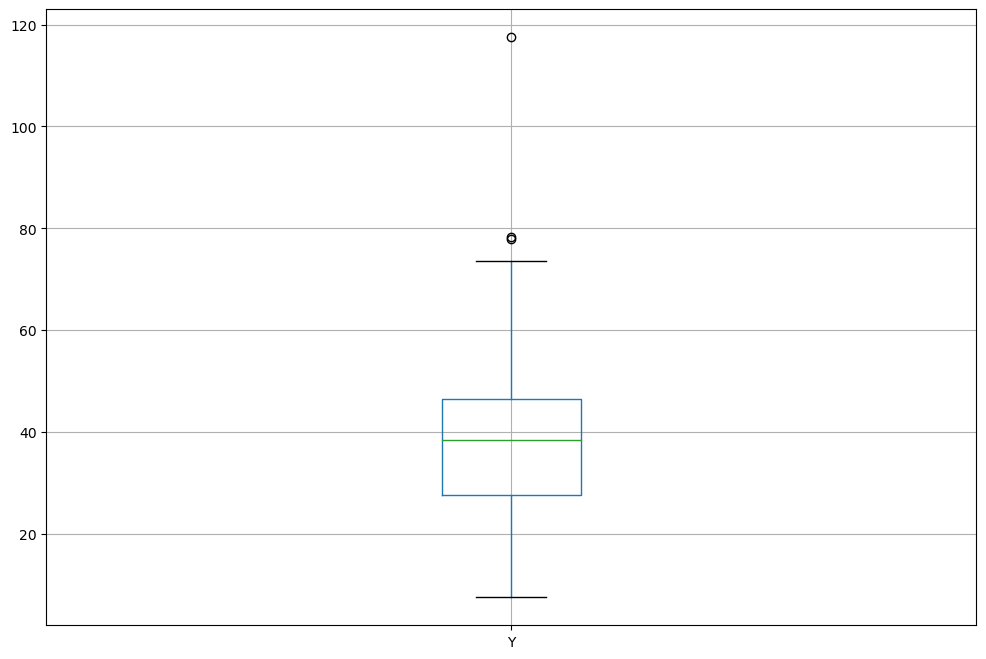

In [11]:
df[['Y']].boxplot(figsize=(12,8))
plt.show()

### Outlier Check

In [12]:
Q1=df['Y'].quantile(q=0.25)
Q3=df['Y'].quantile(q=0.75)

IQR=Q3-Q1

upper_inner_fence=Q3+1.5*IQR
lower_inner_fence=Q1-1.5*IQR

print('Batas atas outlier adalah',upper_inner_fence)
print('Batas bawah outlier adalah',lower_inner_fence)

Batas atas outlier adalah 74.95
Batas bawah outlier adalah -0.6500000000000021


In [13]:
df['Y'][df['Y']>upper_inner_fence]

No
221     78.3
271    117.5
313     78.0
Name: Y, dtype: float64

In [14]:
df['Y'][df['Y']<lower_inner_fence]

Series([], Name: Y, dtype: float64)

Dari variabel harga rumah, terdapat outlier atas yaitu dengan nilai 78.3, 117.5, dan 78. Sedangkan untuk outlier bawahnya tidak ada 

### Correlation

Notes: Korelasi >=0.5(+-) berarti ada hubungan erat antara variabel. Korelasi <0.5(+-) berarti tidak ada hubungan erat antar variabel

In [15]:
df.corr()

,X1,X2,X3,X4,X5,X6,Y
X1,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.087529
X2,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


Berdasarkan tabel korelasi, yang berhubungan erat adalah X3=jarak ke stasiun MRT (-0,67), X4=jumlah convenience store (0,57), X5=latitude (0,546), dan X6=longitude (0,52)

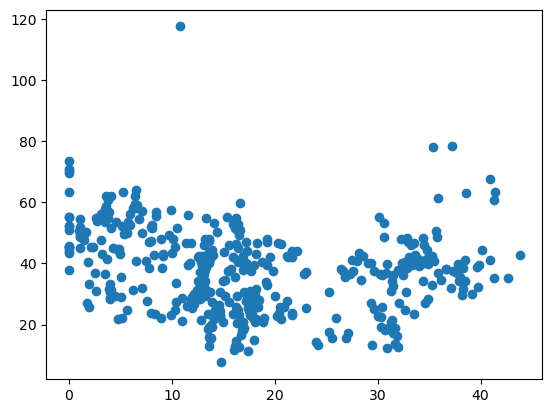

In [16]:
#House Age vs House Price
plt.scatter(df['X2'],df['Y'])
plt.show()

Dari scatter plot di atas, dapat disimpulkan bahwa usia rumah tidak terlalu berkorelasi dengan harga rumah. Dapat dilihat bahwa persebaran usia rumah merata dengan harga rumah yang juga merata

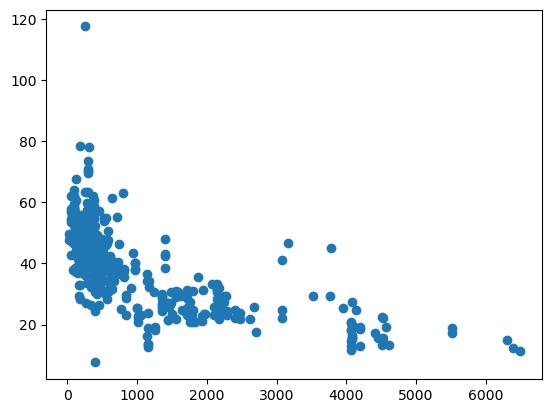

In [17]:
# Distance to the nearest MRT Station vs House Price
plt.scatter(df['X3'],df['Y'])
plt.show()

### Apa yang bisa disimpulkan dari scatter plot di atas?

Dari visualisasi di atas, dapat disimpulkan bahwa semakin dekat jarak rumah ke stasiun MRT, semakin mahal harga rumahnya. Hal ini juga didukung dengan koefisien korelasi yang cukup besar yaitu -0,67

### Lengkapi insight dan Scatter Plot untuk

1. Convenience Store (X4) vs House Price (Y)
2. Latitude (X5) vs House Price (Y)
3. Longitude (X6) vs House Price (Y)

### Convenience Store (X4) vs House Price (Y)

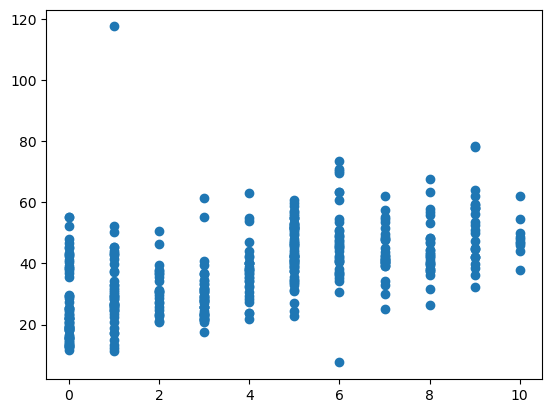

In [18]:
plt.scatter(df['X4'],df['Y'])
plt.show()

Berdasarkan scatter plot di atas, dapat disimpulkan bahwa semakin banyak convenience store yang berada dalam area rumah, maka harga rumah semakin mahal. Hal ini juga didukung dengan koefisien korelasi dengan besar 0,57

### Latitude (X5) vs House Price (Y)

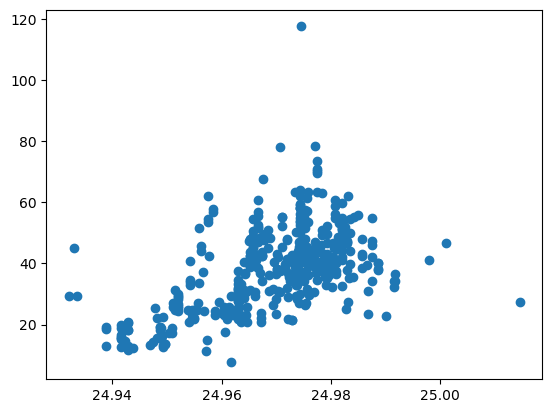

In [19]:
plt.scatter(df['X5'],df['Y'])
plt.show()

Berdasarkan scatter plot di atas, dapat disimpulkan bahwa harga rumah tertinggi terpusat pada suatu lokasi, yaitu disekitar latitude 24,96 - 24,98. Hal ini juga didukung dengan koefisien korelasi sebesar 0,546

### Longitude (X6) vs House Price (Y)

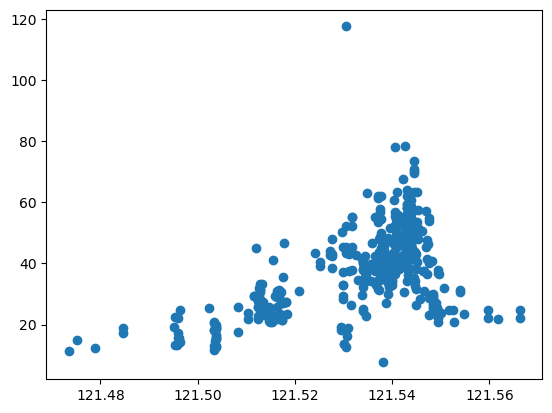

In [20]:
plt.scatter(df['X6'],df['Y'])
plt.show()

Berdasarkan scatter plot di atas, dapat disimpulkan bahwa harga rumah tertinggi terpusat pada suatu lokasi, yaitu disekitar longitude 121,54. Hal ini juga didukung dengan koefisien korelasi sebesar 0,523

## Pre-Processing

## Feature Engineering

### Multicolinearity

Text(0.5, 1.0, 'Correlation Matrix Antara Variabel X')

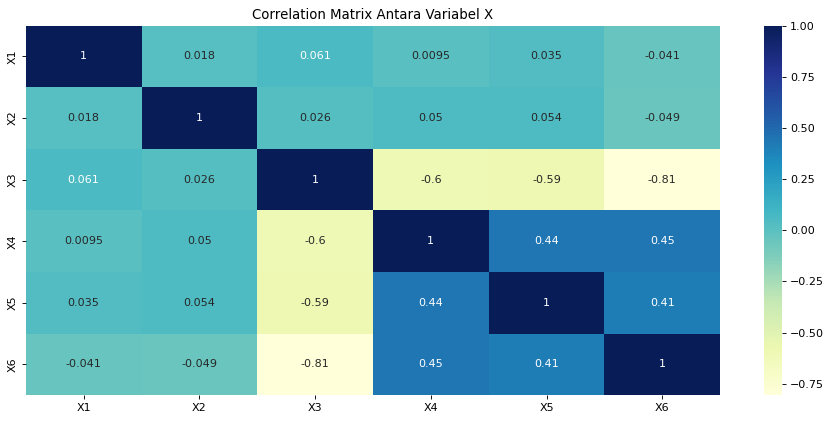

In [21]:
fig, ax = plt.subplots(1,1,figsize=(14,6),dpi=80)
sns.heatmap(df.loc[:,'X1':'X6'].corr(),cmap='YlGnBu',annot=True)
plt.title('Correlation Matrix Antara Variabel X')

Ada multikolinearitas antara variabel X3 dan X6 (-0.81) sehingga X6 tidak dimasukkan ke dalam model. Kenapa X6? Karena sebelumnya korelasi X3 dengan Y yang paling besar

Parameter keputusan: Dilihat dari koefisien korelasi antara 2 variabel X dengan variabel Y, jika ada koefisien relasi yang lebih tinggi dengan variabel Y, maka variabel tersebut yang dipertahankan

### Cek Nilai Null dan Data Types

In [22]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
Y     0
dtype: int64

## Create Model and Evaluation

In [23]:
df.head()

,X1,X2,X3,X4,X5,X6,Y
No,,,,,,,
1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


### Split X dan Y

In [24]:
X = df.loc[:,'X3':'X5']

In [25]:
y = pd.DataFrame(df['Y'])

In [26]:
X.head()

,X3,X4,X5
No,,,
1,84.87882,10,24.98298
2,306.59470,9,24.98034
3,561.98450,5,24.98746
4,561.98450,5,24.98746
5,390.56840,5,24.97937


In [27]:
y.head()

,Y
No,
1,37.9
2,42.2
3,47.3
4,54.8
5,43.1


## Split Train Test

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

## Feature Scallling

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
y_train=sc.fit_transform(y_train)
y_test=sc.transform(y_test)

In [30]:
np.set_printoptions(suppress=True)
print(X_train[:10])

[[ 1.73006556 -1.47801238  2.59757002]
 [-0.17242236 -0.09700434  0.7960478 ]
 [-0.45007966 -0.44225635  0.08400604]
 [-0.5218806   0.93875169 -0.13421334]
 [-0.05221979 -0.09700434  1.59295265]
 [-0.47630129 -1.47801238  0.21008835]
 [ 2.4531781  -1.47801238 -2.10465353]
 [-0.74680508  0.24824767 -0.18351476]
 [-0.46698568  0.24824767  0.53499276]
 [-0.34613824  0.24824767 -0.02429543]]


In [31]:
print(y_train[:10])

[[ 0.60598821]
 [-0.22945407]
 [-0.1610997 ]
 [-0.32059323]
 [-0.0319859 ]
 [-0.01679604]
 [-1.55097186]
 [ 1.28193696]
 [ 1.40345584]
 [-0.58641577]]


In [32]:
print(X_test[:10])

[[-0.43577698  1.2840037   0.09370468]
 [-0.53048785  0.59349968  0.75725324]
 [ 0.93349708 -0.44225635 -0.46800817]
 [-0.4368346  -1.13276037  0.36203369]
 [ 0.90300426 -0.44225635 -0.48659723]
 [ 0.62699945 -0.78750836  1.43130866]
 [-0.22344122 -0.78750836  0.72249978]
 [-0.45847157 -1.47801238  0.2650473 ]
 [-0.51567001  0.93875169  0.82595193]
 [-0.75839904  1.62925571  0.42992417]]


In [33]:
print(y_test[:10])

[[ 0.34776059]
 [ 0.16548228]
 [-0.82945353]
 [-0.33578309]
 [-1.14084565]
 [-0.57122591]
 [-0.08515041]
 [-0.22185914]
 [ 0.15029242]
 [ 1.5477595 ]]


## Modelling

### Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [35]:
ypred=sc.inverse_transform(linreg.predict(X_test))
ypred_test=pd.DataFrame(ypred)
ypred_test

,0
0,45.325861
1,45.287890
2,30.758397
3,38.499980
4,30.891863
...,...
78,35.452881
79,36.018635
80,14.610021
81,39.511224


In [36]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse_linreg=mean_squared_error(sc.inverse_transform(y_test),ypred).round(2)
mse_linreg

119.31

In [37]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae_linreg=mean_absolute_error(sc.inverse_transform(y_test),ypred).round(2)
mae_linreg

6.49

In [38]:
#R-Square
from sklearn.metrics import r2_score
r2_linreg=r2_score(sc.inverse_transform(y_test),ypred).round(2)
r2_linreg

0.46

Model regresi yang baik yaitu jika r2_scorenya > 75%

### Ridge Regression

In [39]:
from sklearn.linear_model import Ridge
Ridge=Ridge(alpha=0.5)
Ridge.fit(X_train,y_train)

Ridge(alpha=0.5)

In [40]:
ypred_r=sc.inverse_transform(Ridge.predict(X_test))
ypred_train_r=pd.DataFrame(ypred_r)
ypred_train_r

,0
0,45.322367
1,45.284565
2,30.766865
3,38.495416
4,30.899958
...,...
78,35.458438
79,36.022735
80,14.629680
81,39.505871


In [41]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse_r=mean_squared_error(sc.inverse_transform(y_test),ypred_r).round(2)
mse_r

119.31

In [42]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae_r=mean_absolute_error(sc.inverse_transform(y_test),ypred_r).round(2)
mae_r

6.48

In [43]:
#R-Square
from sklearn.metrics import r2_score
r2_r=r2_score(sc.inverse_transform(y_test),ypred_r).round(2)
r2_r

0.46

### Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor
y_train=y_train.ravel()
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [45]:
ypred_rfr=sc.inverse_transform(rfr.predict(X_test).reshape(-1,1))

In [46]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse_rfr=mean_squared_error(sc.inverse_transform(y_test),ypred_rfr).round(2)
mse_rfr

90.24

In [47]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae_rfr=mean_absolute_error(sc.inverse_transform(y_test),ypred_rfr).round(2)
mae_rfr

5.04

In [48]:
#R-Square
from sklearn.metrics import r2_score
r2_rfr=r2_score(sc.inverse_transform(y_test),ypred_rfr).round(2)
r2_rfr

0.59

### SVR

In [49]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,y_train)

SVR()

In [50]:
ypred_svr=sc.inverse_transform(svr.predict(X_test).reshape(-1,1))

In [51]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse_svr=mean_squared_error(sc.inverse_transform(y_test),ypred_svr).round(2)
mse_svr

101.54

In [52]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae_svr=mean_absolute_error(sc.inverse_transform(y_test),ypred_svr).round(2)
mae_svr

5.41

In [53]:
#R-Square
from sklearn.metrics import r2_score
r2_svr=r2_score(sc.inverse_transform(y_test),ypred_svr).round(2)
r2_svr

0.54

## Model Comparison

In [54]:
data = np.array([['','R-Square','MSE','MAE'],
                 ['Linear Regression',r2_linreg,mse_linreg,mae_linreg],
                 ['Ridge',r2_r,mse_r,mae_r,],
                 ['Random Forest',r2_rfr,mse_rfr,mae_rfr],
                 ['SVR',r2_svr,mse_svr,mae_svr]
                ])

table=pd.DataFrame(data=data[1:,1:],
                    index=data[1:,0],
                    columns=data[0,1:])

table

,R-Square,MSE,MAE
Linear Regression,0.46,119.31,6.49
Ridge,0.46,119.31,6.48
Random Forest,0.59,90.24,5.04
SVR,0.54,101.54,5.41


## Kesimpulan

Berdasarkan model yang sudah ditrain dan dibandingkan scorenya, dapat dilihat bahwa Random Forest Regressor memiliki scoring paling baik yaitu dengan R Square 0.6, MSE 88.53, dan MAE 4.92. Sehingga model dengan menggunakan Random Forest Regressor dapat digunakan untuk prediksi

# **END OF THE CODE**